In [71]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, AdaBoostRegressor, VotingClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Table of Content

#### 1. HR Analytics
- [1.1 Load and Sample the data](#p1.1)
- [1.2 Build the Model(s)](#p1.2)
    - [1.2.1 Logistic Regression](#p1.2.1)
    - [1.2.2 K-Nearest Neighbour](#p1.2.2)
    - [1.2.3 DT Classifier](#p1.2.3)
    - [1.2.4 ANN](#p1.2.4)
    - [1.2.5 Ensemble](#p1.2.5)
        - [1.2.5.1 Random Forest](#p1.2.5.1)
        - [1.2.5.2 AdaBoost](#p1.2.5.2)
        - [1.2.5.3 XGBoost](#p1.2.5.3)
    - [1.2.6 SVM](#p1.2.6)

#### 2. AirBNB
- [2.1 Load and Sample the Data](#p2.1)
- [2.2 Build the Model(s)](#p2.2)
    - [2.2.1 Linear Regression](#p2.2.1)
    - [2.2.2 KNN](#p2.2.2)
    - [2.2.3 DTree Reg](#p2.2.3)
    - [2.2.4 Ensemble](#p2.2.4)
        - [2.2.4.1 Random Forest](#p2.2.4.1)
        - [2.2.4.2 AdaBoost](#p2.2.4.2)
        - [2.2.4.3 XGBoost](#p2.2.4.3)
    - [2.2.5 MLP](#p2.2.5)
    - [2.2.6 SVM](#p2.2.6)

## 1. HR Analytics

### 1.1 Load and Sample the data <a id="p1.1"></a>

In [2]:
df_hr = pd.read_csv("./datasets/HR_cleaned.csv")
df_hr.head()

,Unnamed: 0,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,11,0,0,0,0,0.0,0.375,1.00,0.060606,1,0,0.169492,1
1,39,0,1,1,0,0.0,0.325,1.00,0.151515,1,0,0.186441,1
2,60,0,2,1,1,0.0,0.750,0.75,0.484848,1,0,0.118644,1
3,66,1,3,1,1,0.0,0.175,0.50,0.000000,1,1,0.305085,1
4,67,0,3,1,0,0.0,0.175,0.50,0.000000,0,0,0.355932,1


In [3]:
#data has already been pre-sampled
#remove index extracted previously
df_hr.drop(["Unnamed: 0"], axis=1, inplace=True)
df_hr.head()

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0.0,0.375,1.00,0.060606,1,0,0.169492,1
1,0,1,1,0,0.0,0.325,1.00,0.151515,1,0,0.186441,1
2,0,2,1,1,0.0,0.750,0.75,0.484848,1,0,0.118644,1
3,1,3,1,1,0.0,0.175,0.50,0.000000,1,1,0.305085,1
4,0,3,1,0,0.0,0.175,0.50,0.000000,0,0,0.355932,1


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   int64  
 1   region                9336 non-null   int64  
 2   gender                9336 non-null   int64  
 3   recruitment_channel   9336 non-null   int64  
 4   no_of_trainings       9336 non-null   float64
 5   age                   9336 non-null   float64
 6   previous_year_rating  9336 non-null   float64
 7   length_of_service     9336 non-null   float64
 8   KPIs_met >80%         9336 non-null   int64  
 9   awards_won?           9336 non-null   int64  
 10  avg_training_score    9336 non-null   float64
 11  is_promoted           9336 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 875.4 KB


In [5]:
#tt split
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr["is_promoted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

### 1.2 Build the Model(s) <a id="p1.2"></a>

#### 1.2.1 Logistic Regression <a id="p1.2.1"></a>

In [52]:
lg= LogisticRegression(solver='lbfgs',max_iter=10000)
lg.fit(X_train,y_train)

train_acc = lg.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
test_acc = lg.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7257842387146136
the testing accuracy is:  0.7229560871117459


#### 1.2.2 K-Nearest Neighbour <a id="p1.2.2"></a>

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('training accuracy is: ', knn.score(X_train,y_train))
print('testing accuracy is: ', knn.score(X_test,y_test))

training accuracy is:  0.8059678653404744
testing accuracy is:  0.691181720813995


#### 1.2.3 DT Classifier <a id="p1.2.3"></a>

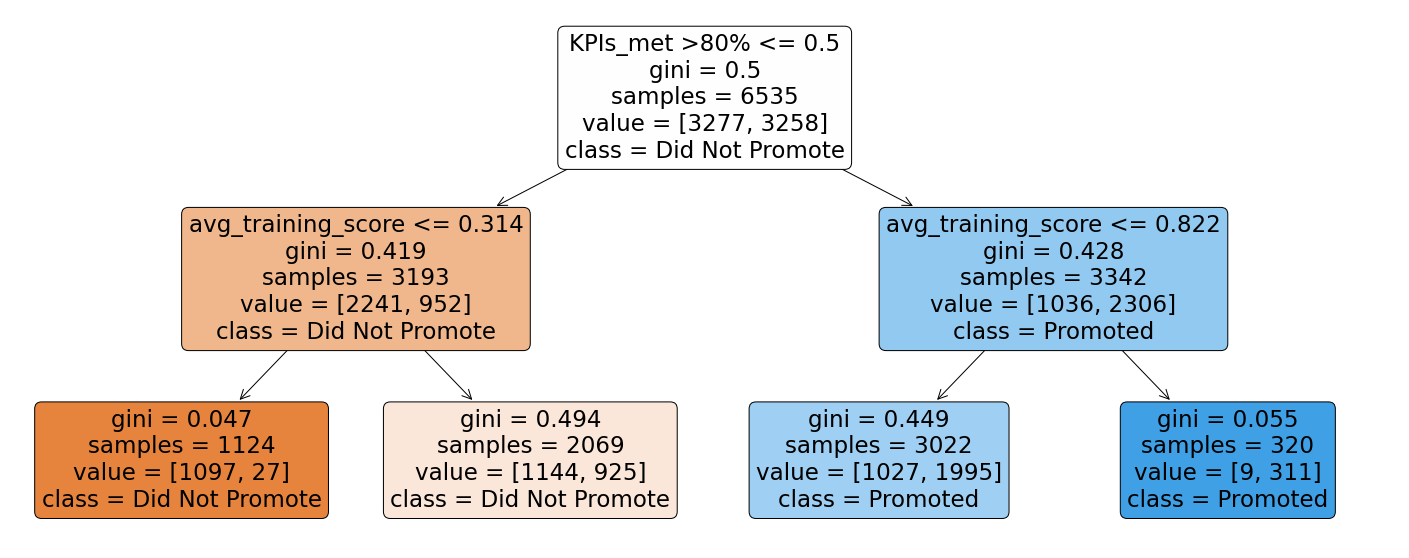

In [6]:
#model d tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df_hr.drop(['is_promoted'], axis=1)),
                class_names = ['Did Not Promote', 'Promoted'],
                rounded = True,
                filled= True)
plt.show()          

In [7]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.69054633 0.69179274 0.68951667 0.68831169 0.69098942]
test_score:  [0.68897216 0.683985   0.69309052 0.69791109 0.68719871]


In [8]:
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6957918898240245
the testing accuracy is:  0.6772581220992503


#### Hyper Param Tuning

In [61]:
dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16, 32, 64, 128], 'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.8010780636066894
{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 32}


alternatively, we have to option to use RandomizedSearchCV to randomly try parameters up to a maximum speficied number of iteration instead of all possible combinations. This is more applicable to a real-life setting where our computational power is insufficent to run a dataset that is too large.

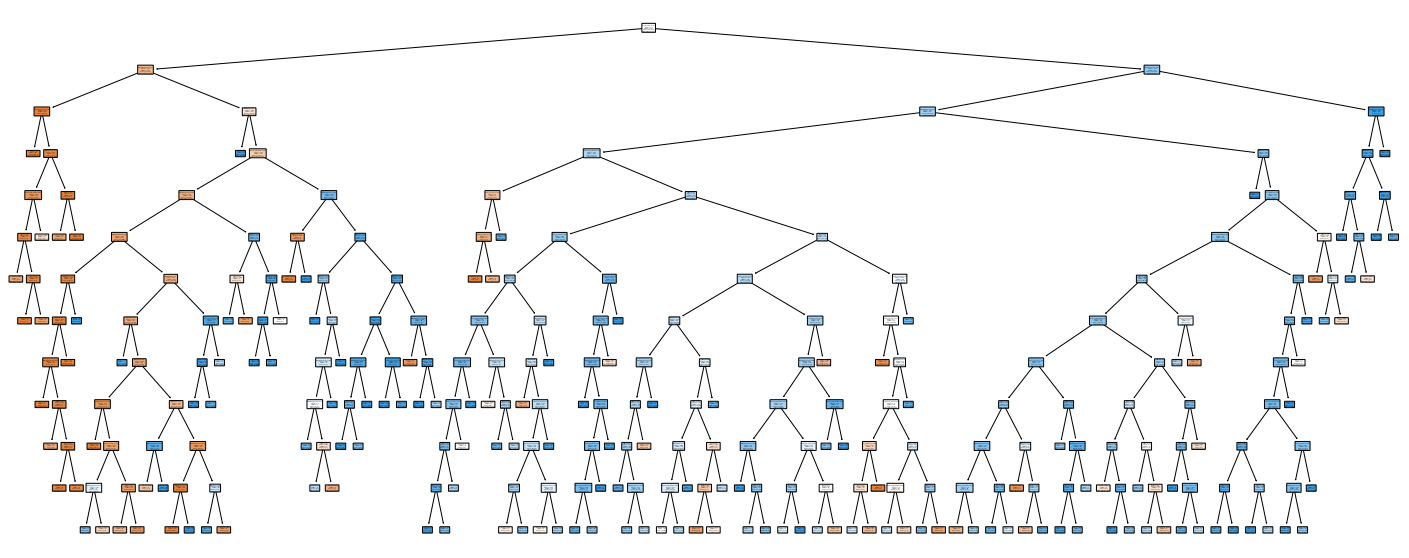

In [62]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12, min_samples_leaf = 5, min_samples_split =32, random_state=1)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df_hr.drop(['is_promoted'], axis=1)),
                class_names = ['Did Not Promote', 'Promoted'],
                rounded = True,
                filled= True)
plt.show()

In [63]:
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.8403978576893649
the testing accuracy is:  0.7861478043555873


In [64]:
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.83208356 0.84469139 0.83558709 0.83612264 0.83746151]
test_score:  [0.7987152  0.79700054 0.81521157 0.80931976 0.80342796]


In [65]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(decision_tree.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
10,avg_training_score,0.367115
0,department,0.223284
8,KPIs_met >80%,0.207127
6,previous_year_rating,0.090019
1,region,0.031190
5,age,0.023816
7,length_of_service,0.022797
9,awards_won?,0.020975
2,gender,0.004657
4,no_of_trainings,0.004612


#### 1.2.4 ANN <a id="p1.2.4"></a>

In [9]:
#define ann model
mlp = MLPClassifier(solver='adam') #use default params
# <adam> solver good for dataset with more rows

In [10]:
mlp.fit(X_train,y_train)

print(mlp.score(X_train, y_train), '(Train Accuracy)')
print(mlp.score(X_test, y_test), '(Test Accuracy)')

0.7914307574598317 (Train Accuracy)
0.7807925740806855 (Test Accuracy)


In [11]:
mlp = MLPClassifier()
param_grid = {"activation" : ["logistic", "relu"],
              "hidden_layer_sizes" : [(5,),(10,),(20,)],
              "max_iter" : [200,2000,4000],
              "solver" : ['lbfgs', 'sgd', 'adam']}

gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)

gs=gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.7978654153261119
{'activation': 'logistic', 'hidden_layer_sizes': (20,), 'max_iter': 4000, 'solver': 'lbfgs'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [28]:
mlp = MLPClassifier(activation="logistic", hidden_layer_sizes=(20,), max_iter=4000, solver="lbfgs")

In [29]:
mlp.fit(X_train,y_train)

print(mlp.score(X_train, y_train), '(Train Accuracy)')
print(mlp.score(X_test, y_test), '(Test Accuracy)')

0.8339709257842387 (Train Accuracy)
0.8014994644769725 (Test Accuracy)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
results  = cross_validate(mlp, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

train_score:  [0.8247188  0.83357879 0.82460838 0.82273397 0.82447449]
test_score:  [0.79925054 0.79325121 0.81360471 0.81306909 0.78789502]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### 1.2.5 Ensemble <a id="p1.2.5"></a>

##### 1.2.5.1 Random Forest <a id="p1.2.5.1"></a>

In [127]:
rf = RandomForestClassifier(n_estimators = 10, criterion='entropy', max_depth = 12, min_samples_leaf = 5, min_samples_split =32, random_state=1)
rf.fit(X_train, y_train)

print('training accuracy is: ', rf.score(X_train,y_train))
print('testing accuracy is: ', rf.score(X_test,y_test))

training accuracy is:  0.8198928844682479
testing accuracy is:  0.7843627275972866


In [18]:
rf = RandomForestClassifier()
param_grid = { "criterion" : ["gini", "entropy"], "n_estimators": [1,5,10,20], "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12, 16, 32, 64, 128], 'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

gs = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) #

print(gs.best_score_)
print(gs.best_params_)

0.7987783975160515
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 20}


In [19]:
rf = RandomForestClassifier(n_estimators = 20, criterion='entropy', max_depth = 14, min_samples_leaf = 1,
                            min_samples_split =16, random_state=1)
rf.fit(X_train, y_train)

print('training accuracy is: ', rf.score(X_train,y_train))
print('testing accuracy is: ', rf.score(X_test,y_test))

training accuracy is:  0.8564651874521806
testing accuracy is:  0.7932881113887897


##### 1.2.5.2 AdaBoost <a id="p1.2.5.2"></a>

In [33]:
#ADA gradient boost (on best dtree)
abd = AdaBoostClassifier( tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12, min_samples_leaf = 5, min_samples_split =32, random_state=1)
, n_estimators = 20, learning_rate=0.1)
abd.fit(X_train, y_train)

print('training accuracy is: ', abd.score(X_train,y_train))
print('testing accuracy is: ', abd.score(X_test,y_test))

training accuracy is:  0.9666411629686305
testing accuracy is:  0.7829346661906462


In [34]:
#check overfit
results  = cross_validate(abd, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.95219604 0.95769179 0.94818583 0.94296425 0.94979248]
test_score:  [0.79282655 0.78682378 0.8018211  0.81467595 0.79860739]


In [26]:
abd = AdaBoostClassifier( tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12, min_samples_leaf = 5, min_samples_split =32, random_state=1))
                         
param_grid = {"n_estimators": [1,5,10,20], "learning_rate": [0.01,0.1,0.2,1]}

gs = GridSearchCV(abd, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) #

print(gs.best_score_)
print(gs.best_params_)

0.8071998913506704
{'learning_rate': 0.01, 'n_estimators': 20}


In [27]:
abd = AdaBoostClassifier( tree.DecisionTreeClassifier(criterion='entropy', max_depth = 12, min_samples_leaf = 5, min_samples_split =32, random_state=1)
, n_estimators = 20, learning_rate=0.01)
abd.fit(X_train, y_train)

print('training accuracy is: ', abd.score(X_train,y_train))
print('testing accuracy is: ', abd.score(X_test,y_test))

training accuracy is:  0.8676358071920428
testing accuracy is:  0.8079257408068546


In [28]:
#check overfit
results  = cross_validate(abd, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.86020354 0.86691659 0.86718436 0.86745214 0.87039764]
test_score:  [0.81477516 0.79164435 0.81949652 0.82378147 0.80503482]


##### 1.2.5.3 XGBoost <a id="p1.2.5.3"></a>

In [126]:
xgb = XGBClassifier(n_estimators = 20, learning_rate = 0.1, use_label_encoder = False, eval_metric="logloss")
xgb.fit(X_train, y_train)

print('training accuracy is: ', xgb.score(X_train,y_train))
print('testing accuracy is: ', xgb.score(X_test,y_test))

training accuracy is:  0.8125478194338179
testing accuracy is:  0.7997143877186719


In [35]:
xgb = XGBClassifier()

param_grid = {
    "max_depth": [3, 4, 5, 7,9, 15, 20],
    "learning_rate": [0.1, 0.01, 0.05, 0.3, 0.5, 0.7, 1],
    "gamma": [0, 0.25, 1,3, 5, 7],
    "reg_lambda": [0, 1, 10, 30, 50],
    "scale_pos_weight": [3],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

gs = GridSearchCV(xgb, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)

gs = gs.fit(X_train, y_train) #

print(gs.best_score_)
print(gs.best_params_)

0.8143838599547607
{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 20, 'reg_lambda': 50, 'scale_pos_weight': 3, 'subsample': 0.8}


In [36]:
xgb = XGBClassifier(learning_rate=0.5, colsample_bytree= 0.5, gamma= 0,max_depth= 20, reg_lambda= 50, scale_pos_weight= 3, subsample= 0.8)
xgb.fit(X_train, y_train)

print('training accuracy is: ', xgb.score(X_train,y_train))
print('testing accuracy is: ', xgb.score(X_test,y_test))

training accuracy is:  0.8791124713083397
testing accuracy is:  0.8132809710817566


In [37]:
#check overfit
results  = cross_validate(xgb, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.87399572 0.87227206 0.86852323 0.86919266 0.8698621 ]
test_score:  [0.80942184 0.79807177 0.80557043 0.8248527  0.810391  ]


#### 1.2.6 SVM <a id="p1.2.6"></a>

In [30]:
svc = SVC(C=0.6, kernel = "rbf")
svc.fit(X_train, y_train)

print('training accuracy is: ', svc.score(X_train,y_train))
print('testing accuracy is: ', svc.score(X_test,y_test))

training accuracy is:  0.7046671767406274
testing accuracy is:  0.6865405212424134


In [31]:
svc = SVC()
param_grid = {"kernel" : ["linear", "poly",'rbf','sigmoid'], #precomputed only accepts sqr matrix
              "C" : [0.6,0.8,1.0,1.2,1.4]
             }

gs = GridSearchCV(svc, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)

gs=gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.7172211529005157
{'C': 0.6, 'kernel': 'linear'}


In [32]:
svc = SVC(C=0.6, kernel = "linear")
svc.fit(X_train, y_train)

print('training accuracy is: ', svc.score(X_train,y_train))
print('testing accuracy is: ', svc.score(X_test,y_test))

training accuracy is:  0.7172149961744453
testing accuracy is:  0.7043912888254195


## 2. Airbnb 

### 2.1 Load and Sample the data <a id="p2.1"></a>

In [33]:
df_Abnb = pd.read_csv("./datasets/AirBNB_cleaned.csv")
df_Abnb.head()

,Unnamed: 0,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_months
0,1,0,1,81,1.742322,0.158762,-0.378157,3,0.418532
1,10,1,1,44,1.088031,0.158762,-0.421563,3,-0.751255
2,11,1,1,40,1.413958,-0.113661,-0.525738,3,-0.588063
3,13,2,1,65,-0.554396,3.802425,0.550737,3,-0.842493
4,14,1,1,44,1.413958,-0.011502,-0.491013,3,-0.693396


In [34]:
df_Abnb.drop(["Unnamed: 0"], axis=1, inplace=True)
df_Abnb.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review_months
0,0,1,81,1.742322,0.158762,-0.378157,3,0.418532
1,1,1,44,1.088031,0.158762,-0.421563,3,-0.751255
2,1,1,40,1.413958,-0.113661,-0.525738,3,-0.588063
3,2,1,65,-0.554396,3.802425,0.550737,3,-0.842493
4,1,1,44,1.413958,-0.011502,-0.491013,3,-0.693396


In [35]:
#tt split
X2 = df_Abnb.drop(['price'], axis =1)
y2 = df_Abnb["price"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=22)

### 2.2 Build the Model(s) <a id="p2.2"></a>

#### 2.2.1 Linear Regression <a id="p2.2.1"></a>

In [41]:
lm = LinearRegression()
lm.fit(X2_train, y2_train)

LinearRegression()

In [42]:
y_fitted = lm.predict(X2_train)

print(sqrt(mean_squared_error(y_fitted, y2_train)), '(Train RMSE)')
print(lm.score(X2_train, y2_train), '(Train R^2 Value)')

64.7748011321408 (Train RMSE)
0.416583449503627 (Train R^2 Value)


In [43]:
y_pred = lm.predict(X2_test)

print(sqrt(mean_squared_error(y_pred, y2_test)), '(Test RMSE)')
print(lm.score(X2_test, y2_test), '(Test R^2 Value)')

65.57666885787512 (Test RMSE)
0.4155861206935747 (Test R^2 Value)


#### 2.2.2 KNN <a id="p2.2.2"></a>

In [46]:
knn = KNeighborsRegressor()
knn.fit(X2_train, y2_train)

print('training R^2 is: ', knn.score(X2_train,y2_train))
print('testing R^2 is: ', knn.score(X2_test,y2_test))

training R^2 is:  0.6354106602701277
testing R^2 is:  0.4355992567536473


In [45]:
results  = cross_validate(knn, X2, y2, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.62961652 0.62181168 0.64155817 0.65152837 0.64947292]
test_score:  [0.29454806 0.3492317  0.36284547 0.33950285 0.30755559]


#### 2.2.3 DTree Reg <a id="p2.2.3"></a>

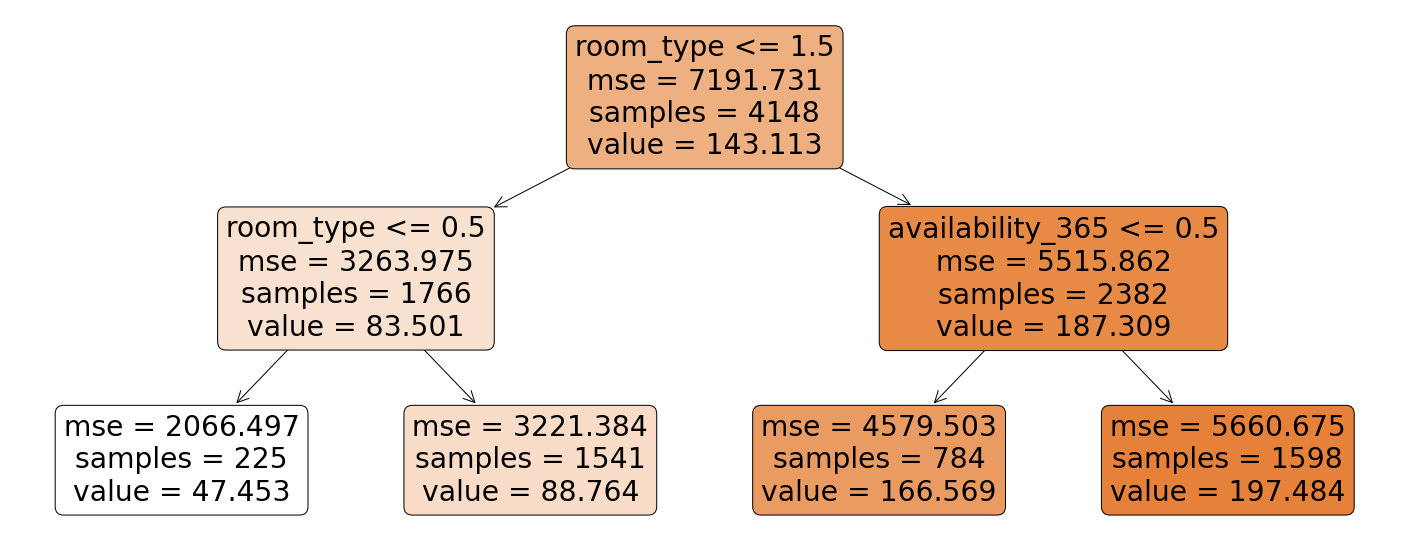

In [52]:
tree_reg = tree.DecisionTreeRegressor(max_depth=2,random_state=22)
tree_reg.fit(X2_train, y2_train)

plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg,
              feature_names = list(df_Abnb.drop(['price'], axis=1)),
                rounded = True,
                filled= True)
plt.show()

In [54]:

train_acc = tree_reg.score(X2_train, y2_train)
train_mse = mean_squared_error(tree_reg.predict(X2_train), y2_train)
train_mae = mean_absolute_error(tree_reg.predict(X2_train), y2_train)

print('RMSE: ',sqrt(train_mse))
print('MAE: ',train_mae)
print('the training R-sqr is: ', train_acc)

RMSE:  65.99363781164597
MAE:  50.84049527461481
the training R-sqr is:  0.3944211396144658


In [61]:
test_acc = tree_reg.score(X2_test, y2_test)
print('the testing R-sqr is: ', test_acc)

the testing R-sqr is:  0.395928554861561


In [100]:
tr = tree.DecisionTreeRegressor(max_depth=2)
param_grid = {"criterion" : ["mse", "friedman_mse", "mae", "poisson"],
              'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12, 16, 32, 64, 128]}

gs = GridSearchCV(tr, param_grid=param_grid, scoring='neg_mean_absolute_error', cv= 10, n_jobs=-1)

gs=gs.fit(X2_train, y2_train)

print(gs.best_score_)
print(gs.best_params_)

-43.51741749607124
{'criterion': 'mae', 'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 32}


In [94]:
tree_reg = tree.DecisionTreeRegressor(max_depth=11,criterion='mae',min_samples_leaf=10,min_samples_split=32)
tree_reg.fit(X2_train,y2_train)

train_acc = tree_reg.score(X2_train, y2_train)
train_mse = mean_squared_error(tree_reg.predict(X2_train), y2_train)
train_mae = mean_absolute_error(tree_reg.predict(X2_train), y2_train)

print('train RMSE: ',sqrt(train_mse))
print('train MAE: ',train_mae)
print('the training R-sqr is: ', train_acc)

train RMSE:  56.79355027589996
train MAE:  36.20178399228544
the training R-sqr is:  0.5514977720498062


In [95]:
pd.concat((pd.DataFrame(X2_train.columns, columns = ['feature']), 
           pd.DataFrame(tree_reg.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
1,room_type,0.575671
0,neighbourhood,0.141453
2,minimum_nights,0.122470
5,availability_365,0.053831
6,last_review_months,0.040954
4,reviews_per_month,0.033777
3,number_of_reviews,0.031844


In [96]:
test_acc = tree_reg.score(X2_test, y2_test)
test_mse = mean_squared_error(tree_reg.predict(X2_test), y2_test)
test_mae = mean_absolute_error(tree_reg.predict(X2_test), y2_test)

print('test MSE: ',sqrt(test_mse))
print('test MAE: ',test_mae)
print('the testing R-sqr is: ', test_acc)

test MSE:  65.28996700885969
test MAE:  43.76138279932546
the testing R-sqr is:  0.4206850765269021


In [97]:
results  = cross_validate(tree_reg, X2, y2, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.55234261 0.54556288 0.53612342 0.56584211 0.55262991]
test_score:  [0.27839205 0.38005587 0.33078732 0.3036738  0.36365785]


In [88]:
depth_range = range(2,15)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Model
    tree_reg = tree.DecisionTreeRegressor(max_depth=d,random_state=1)
    tree_reg.fit(X2_train, y2_train.ravel()) 
    train_mse.append(mean_squared_error(tree_reg.predict(X2_train), y2_train))
    test_mse.append(mean_squared_error(tree_reg.predict(X2_test), y2_test))
    
    results  = cross_validate(tree_reg, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))
    

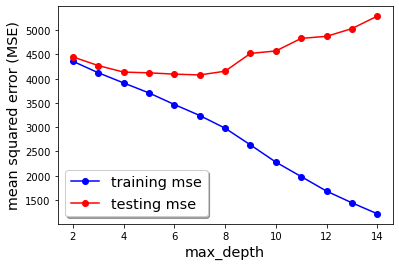

In [89]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [98]:
tree_reg = tree.DecisionTreeRegressor(max_depth=4,criterion='mae',min_samples_leaf=10,min_samples_split=32)
tree_reg.fit(X2_train,y2_train)

train_acc = tree_reg.score(X2_train, y2_train)
train_mse = mean_squared_error(tree_reg.predict(X2_train), y2_train)
train_mae = mean_absolute_error(tree_reg.predict(X2_train), y2_train)

print('train RMSE: ',sqrt(train_mse))
print('train MAE: ',train_mae)
print('the training R-sqr is: ', train_acc)

train RMSE:  64.9700583808985
train MAE:  45.118852459016395
the training R-sqr is:  0.4130608449328249


In [99]:
test_acc = tree_reg.score(X2_test, y2_test)
test_mse = mean_squared_error(tree_reg.predict(X2_test), y2_test)
test_mae = mean_absolute_error(tree_reg.predict(X2_test), y2_test)

print('test MSE: ',sqrt(test_mse))
print('test MAE: ',test_mae)
print('the testing R-sqr is: ', test_acc)

test MSE:  66.46617477320757
test MAE:  46.33726812816189
the testing R-sqr is:  0.3996241860912584


#### 2.2.4 Ensemble <a id="p2.2.4"></a>

##### 2.2.4.1 Random Forest <a id="p2.2.4.1"></a>

In [48]:
rf = RandomForestRegressor(n_estimators = 10, max_depth=4)
rf.fit(X2_train, y2_train)

print('training R2 is: ', rf.score(X2_train,y2_train))
print('testing R2 is: ', rf.score(X2_test,y2_test))

training R2 is:  0.47081710565735146
testing R2 is:  0.44867689142275724


In [53]:
rf = RandomForestRegressor(max_depth=2)
param_grid = {"criterion" : ["mse", "friedman_mse", "mae", "poisson"],
              'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12, 16, 32, 64, 128],
              "n_estimators" : [5,10,20]}

gs = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_absolute_error', cv= 10, n_jobs=-1)

gs=gs.fit(X2_train, y2_train)

print(gs.best_score_)
print(gs.best_params_)

-40.84972177114254
{'criterion': 'mae', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 20}


In [59]:
rf = RandomForestRegressor(n_estimators = 20, max_depth=15, criterion= 'mae', min_samples_leaf= 1, min_samples_split= 12)
rf.fit(X2_train, y2_train)

print('training R2 is: ', rf.score(X2_train,y2_train))
print('testing R2 is: ', rf.score(X2_test,y2_test))

training R2 is:  0.7200298357841616
testing R2 is:  0.5295798905360101


In [60]:
results  = cross_validate(rf, X2, y2, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.71789666 0.71397382 0.72160382 0.73669212 0.72944207]
test_score:  [0.40649403 0.46078077 0.45079475 0.38359229 0.4290811 ]


##### 2.2.4.2 AdaBoost <a id="p2.2.4.2"></a>

In [64]:
abd = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth=11,criterion='mae',min_samples_leaf=10,min_samples_split=32)
, n_estimators = 20, learning_rate=0.1)
abd.fit(X2_train, y2_train)

print('training accuracy is: ', abd.score(X2_train,y2_train))
print('testing accuracy is: ', abd.score(X2_test,y2_test))

training accuracy is:  0.6414788071551498
testing accuracy is:  0.4894260422195662


In [69]:
abd = AdaBoostRegressor( tree.DecisionTreeRegressor(max_depth=11,criterion='mae',min_samples_leaf=10,min_samples_split=32))
                         
param_grid = {"n_estimators": [1,5,10,20], "learning_rate": [0.01,0.1,0.2,1]}

gs = GridSearchCV(abd, param_grid=param_grid, scoring='neg_mean_absolute_error', cv= 10, n_jobs=-1)

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

-0.214760269000754
{'learning_rate': 0.01, 'n_estimators': 20}


In [100]:
abd = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth=11,criterion='mae',min_samples_leaf=10,min_samples_split=32)
, n_estimators = 20, learning_rate=0.01)
abd.fit(X2_train, y2_train)

print('training r^2 is: ', abd.score(X2_train,y2_train))
print('testing r^2 is: ', abd.score(X2_test,y2_test))

training r^2 is:  0.6010789083529007
testing r^2 is:  0.49862993694921043


In [103]:
results  = cross_validate(abd, X2, y2, scoring='r2', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.60250618 0.59414615 0.59794382 0.62124944 0.59386583]
test_score:  [0.38747976 0.4171425  0.45348707 0.35880952 0.42186527]


##### 2.2.4.3 XGBoost <a id="p2.2.4.3"></a>

In [65]:
xgb = XGBRegressor(n_estimators = 20, learning_rate = 0.1, use_label_encoder = False, eval_metric="logloss")
xgb.fit(X2_train, y2_train)

print('training r^2 is: ', xgb.score(X2_train,y2_train))
print('testing r^2 is: ', xgb.score(X2_test,y2_test))

training accuracy is:  0.5248629550943784
testing accuracy is:  0.4535311052369474


In [77]:
xgbr = XGBRegressor()
param_grid = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_mean_absolute_error', cv= 10, n_jobs=-1, n_iter=25)
# n_iter: number if iterations

gs=gs.fit(X2_train, y2_train)

print(gs.best_score_)
print(gs.best_params_)

-41.00834274393238
{'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.6}


In [101]:
xgb = XGBRegressor(subsample= 0.7999999999999999, n_estimators= 500, max_depth= 15, learning_rate= 0.01,
                   colsample_bytree= 0.8999999999999999, colsample_bylevel= 0.6)
xgb.fit(X2_train, y2_train)

print('training r^2 is: ', xgb.score(X2_train,y2_train))
print('testing r^2 is: ', xgb.score(X2_test,y2_test))

training r^2 is:  0.8902697360843682
testing r^2 is:  0.5411266670831316


#### 2.2.5 MLP <a id="p2.2.5"></a>

In [105]:
#define ann model
mlp = MLPRegressor(solver='adam') #use default params
# <adam> solver good for dataset with more rows

In [106]:
mlp.fit(X2_train,y2_train)

print(mlp.score(X2_train, y2_train), '(Train R2)')
print(mlp.score(X2_test, y2_test), '(Test R2)')

0.4457378628985882 (Train R2)
0.43610976244844524 (Test R2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
train_mse = mean_squared_error(mlp.predict(X2_train), y2_train)
train_mae = mean_absolute_error(mlp.predict(X2_train), y2_train)

print('train RMSE: ',sqrt(train_mse))
print('train MAE: ',train_mae)

train RMSE:  63.13560140387234
train MAE:  48.420002954814414


In [56]:
mlp = MLPRegressor()
param_grid = {"activation" : ["relu",'tanh'],
              "hidden_layer_sizes" : [(5,),(10,),(20,)],
              "max_iter" : [200,2000,4000],
              "solver" : ['lbfgs', 'sgd', 'adam']}

gs = GridSearchCV(mlp, param_grid=param_grid, scoring='neg_mean_absolute_error', cv= 10, n_jobs=-1)

gs=gs.fit(X2_train, y2_train)

print(gs.best_score_)
print(gs.best_params_)

-46.95923843918767
{'activation': 'tanh', 'hidden_layer_sizes': (20,), 'max_iter': 4000, 'solver': 'adam'}


In [110]:
mlp = MLPRegressor(solver='adam', activation= 'tanh', hidden_layer_sizes= (20,), max_iter= 4000)
mlp.fit(X2_train,y2_train)

print(mlp.score(X2_train, y2_train), '(Train R2)')
print(mlp.score(X2_test, y2_test), '(Test R2)')

0.4916959039194184 (Train R2)
0.4726921689127255 (Test R2)


In [111]:
train_mse = mean_squared_error(mlp.predict(X2_train), y2_train)
test_mse = mean_squared_error(mlp.predict(X2_test), y2_test)

print('train RMSE: ',sqrt(train_mse))
print('test RMSE: ',sqrt(test_mse))

train RMSE:  60.46144472897867
test RMSE:  62.29041173806407


In [112]:
train_mae = mean_absolute_error(mlp.predict(X2_train), y2_train)
test_mae = mean_absolute_error(mlp.predict(X2_test), y2_test)

print('train MAE: ',train_mae)
print('test MAE: ',test_mae)

train MAE:  45.53150833055402
test MAE:  46.92750405337491


#### 2.2.6 SVM <a id="p2.2.6"></a>

In [80]:
svr = SVR(C=0.8, kernel = "rbf")
svr.fit(X2_train, y2_train)

print('training r^2 is: ', svr.score(X2_train,y2_train))
print('testing r^2 is: ', svr.score(X2_test,y2_test))

training r^2 is:  0.08563196008248286
testing r^2 is:  0.07618732183046417


In [81]:
svr = SVR()
param_grid = {"kernel" : ["linear", "poly",'rbf','sigmoid'], #precomputed only accepts sqr matrix
              "C" : [0.6,0.8,1.0,1.2,1.4]
             }

gs = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_absolute_error', cv= 10, n_jobs=-1)

gs=gs.fit(X2_train, y2_train)

print(gs.best_score_)
print(gs.best_params_)

-48.39985240179743
{'C': 1.4, 'kernel': 'linear'}


In [82]:
svr = SVR(C=1.4, kernel = "linear")
svr.fit(X2_train, y2_train)

print('training r^2 is: ', svr.score(X2_train,y2_train))
print('testing r^2 is: ', svr.score(X2_test,y2_test))

training r^2 is:  0.3764758220147857
testing r^2 is:  0.37168732192551834


In [83]:
train_mse = mean_squared_error(svr.predict(X2_train), y2_train)
train_mae = mean_absolute_error(svr.predict(X2_train), y2_train)

print('MSE: ',sqrt(train_mse))
print('MAE: ',train_mae)

MSE:  66.96430487629816
MAE:  48.26740272574307


In [84]:
test_mse = mean_squared_error(svr.predict(X2_test), y2_test)
test_mae = mean_absolute_error(svr.predict(X2_test), y2_test)

print('MSE: ',sqrt(test_mse))
print('MAE: ',test_mae)

MSE:  67.99500381678247
MAE:  48.520669594746465
